# EDA: CNC Milling Dataset

This file is intended to perform data visualization. In the following, the experiment data are plotted and analyzed. 

In [2]:
import pandas as pd
import random
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import numpy as np

In [3]:
# import data from one random experiment
experiment_number = random.randint(10,18)
experiment = pd.read_csv('.\experiments\experiment_' + str(experiment_number) + '.csv')
experiment.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,141.0,0.125,50.0,141.0,0.0,0.0,-3.38,0.0710,327.0,5.93,...,23.0,0.976,319.0,116.0,0.188,12.0,1.0,2.0,3.0,Prep
1,141.0,-0.100,-50.0,141.0,0.0,0.0,-2.54,0.0492,327.0,5.04,...,24.4,0.989,323.0,117.0,0.190,12.0,1.0,26.0,3.0,Prep
2,141.0,-0.125,-62.5,141.0,0.0,0.0,-2.70,0.0508,327.0,3.93,...,15.1,0.834,324.0,115.0,0.158,12.0,1.0,26.0,3.0,Prep
3,141.0,0.150,68.7,141.0,0.0,0.0,-4.18,0.0710,327.0,5.20,...,18.1,0.912,318.0,113.0,0.174,12.0,1.0,26.0,3.0,Prep
4,141.0,-0.100,-50.0,141.0,0.0,0.0,-2.15,0.0561,327.0,5.42,...,21.9,0.972,323.0,119.0,0.187,12.0,1.0,26.0,3.0,Prep


As a first step, one can drop the variables that, at firts sight, do not show any correlation with tool wear. They are:

- X1_ActualPosition;
- X1_CommandPosition;
- Y1_ActualPosition;
- Y1_CommandPosition;
- Z1_ActualPosition;
- Z1_CommandPosition;
- S1_ActualPosition;
- S1_CommandPosition;

It is seen that the parameter S1_SystemInertia remains the same over all experiments, as the same machine performs the machining operation. Therefore, this column will also be dropped and a variable spindle_inertia is created.

In [4]:
spindle_inertia = 12.0 #kg.m²
experiment.drop(['X1_ActualPosition', 'X1_CommandPosition', 'Y1_ActualPosition', 'Y1_CommandPosition', 'Z1_ActualPosition',
                'Z1_CommandPosition', 'S1_ActualPosition', 'S1_CommandPosition', 'S1_SystemInertia'], axis = 1, inplace = True)
experiment.head()

,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualVelocity,...,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,0.125,50.0,0.0,0.0,-3.38,0.0710,327.0,5.93,0.000034,3.00,...,9.540000e-07,23.0,0.976,319.0,116.0,0.188,1.0,2.0,3.0,Prep
1,-0.100,-50.0,0.0,0.0,-2.54,0.0492,327.0,5.04,-0.000015,2.80,...,0.000000e+00,24.4,0.989,323.0,117.0,0.190,1.0,26.0,3.0,Prep
2,-0.125,-62.5,0.0,0.0,-2.70,0.0508,327.0,3.93,-0.000038,2.85,...,0.000000e+00,15.1,0.834,324.0,115.0,0.158,1.0,26.0,3.0,Prep
3,0.150,68.7,0.0,0.0,-4.18,0.0710,327.0,5.20,0.000067,2.67,...,0.000000e+00,18.1,0.912,318.0,113.0,0.174,1.0,26.0,3.0,Prep
4,-0.100,-50.0,0.0,0.0,-2.15,0.0561,327.0,5.42,-0.000009,3.05,...,9.540000e-07,21.9,0.972,323.0,119.0,0.187,1.0,26.0,3.0,Prep


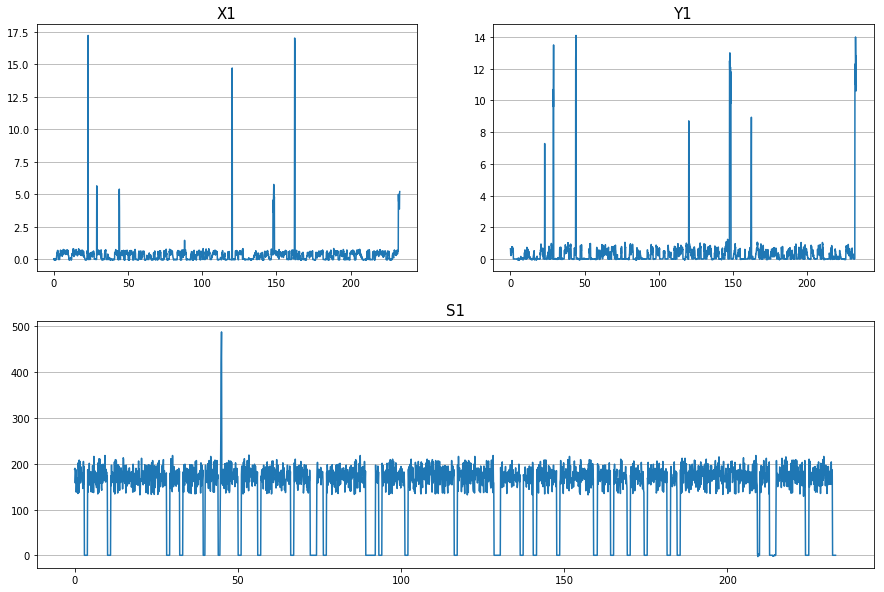

In [5]:
### SUBPLOTS FOR OUTPUT POWER ###
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize = (15,10))

# X1
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot(np.arange(0,len(experiment.index)*0.1, 0.1), experiment['X1_OutputPower']*1000)
pl.title('X1', fontsize = 15)
pl.grid(axis = 'y')

# Y1
ax = pl.subplot(gs[0, 1]) # row 0, col 1
pl.plot(np.arange(0,len(experiment.index)*0.1, 0.1), experiment['Y1_OutputPower']*1000)
pl.title('Y1', fontsize = 15)
pl.grid(axis = 'y')

# S1
ax = pl.subplot(gs[1, :]) # row 1, span all columns
pl.plot(np.arange(0,len(experiment.index)*0.1, 0.1), experiment['S1_OutputPower']*1000)
pl.title('S1', fontsize = 15)
pl.grid(axis = 'y');

## Investigation 1) Spindle Output Power

We create a class for the investigations undertaken on the spindle output power.

1) Fourier Transform: We seek for a correlation between the signal features extracted in the Fourier Transform and the tool condition (unworn, worn). 

In [6]:
from dataloader import DataLoader
import numpy as np
from scipy import fftpack
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

class SpindlePower:
    """The class will contain all signal processing operations performed on the spindle output power signal.
    All future investigations and modeling with regards to the spindle power will attribute the class to the respective
    variable.
    """
    
    def __init__(self):
        pass
    
    def load_experiments(self, experimentsPath, verbose = 1):
        # grabs files and stores only the spindle output powers of the experiments
        # attributes the status worn or unworn to outputs
        dl = DataLoader()
        experiments, outputs = dl.load(experimentsPath)
        
        # extract spindle output power and rewrite variable experiments
        power_signal = []
        tool_condition = []
        process_complete = []
        visual_inspection = []
        for i in np.arange(0,len(experiments)):
            power_signal.append(experiments[i].iloc[:,-6])
            tool_condition.append(outputs.iloc[i,-3])
            process_complete.append(outputs.iloc[i,-2])
            visual_inspection.append(outputs.iloc[i,-1])
        
        # substituting NaNs
        for i in np.arange(0,len(visual_inspection)):
            if isinstance(visual_inspection[i], str) is False: visual_inspection[i] = "no" # exchanges NaNs for Nos
        
        lb1 = LabelBinarizer()
        lb2 = LabelBinarizer()
        lb3 = LabelBinarizer()
        tool_condition = lb1.fit_transform(tool_condition)
        process_complete = lb2.fit_transform(process_complete) 
        visual_inspection = lb3.fit_transform(visual_inspection)
        
        return power_signal, tool_condition, process_complete, visual_inspection
    
    def fourier_transform(self, power_signal):
        # applys the fast fourier transform
        ps_fft = fftpack.fft(power_signal)
        
        # computes the absolute value of the FFT
        ps_psd = np.abs(ps_fft)
        
        # computes the frequency array
        freq = fftpack.fftfreq(power_signal.size)*10
        
        return ps_psd, freq

### 1.1) Fourier Transform Investigation

In [7]:
import glob

# import experiment data
print("[INFO] loading files...")
experimentsPath = "C:/Users/thiag/Desktop/MachineLearning/projects/toolwear_cncmilling/experiments/*.csv"
experimentsPath = glob.glob(experimentsPath)
sp = SpindlePower()
power_signal, tool_condition, process_complete, visual_inspection = sp.load_experiments(experimentsPath)
print("[INFO] files successfully loaded!")

# FFT calculation
ps_psd = []
ps_freq = []
for i in np.arange(len(power_signal)):
    psd, freq = sp.fourier_transform(power_signal[i])
    ps_psd.append(psd)
    ps_freq.append(freq)
print("[INFO] Fourier Transform successfuly calculated!")

[INFO] loading files...
[INFO] files successfully loaded!
[INFO] Fourier Transform successfuly calculated!


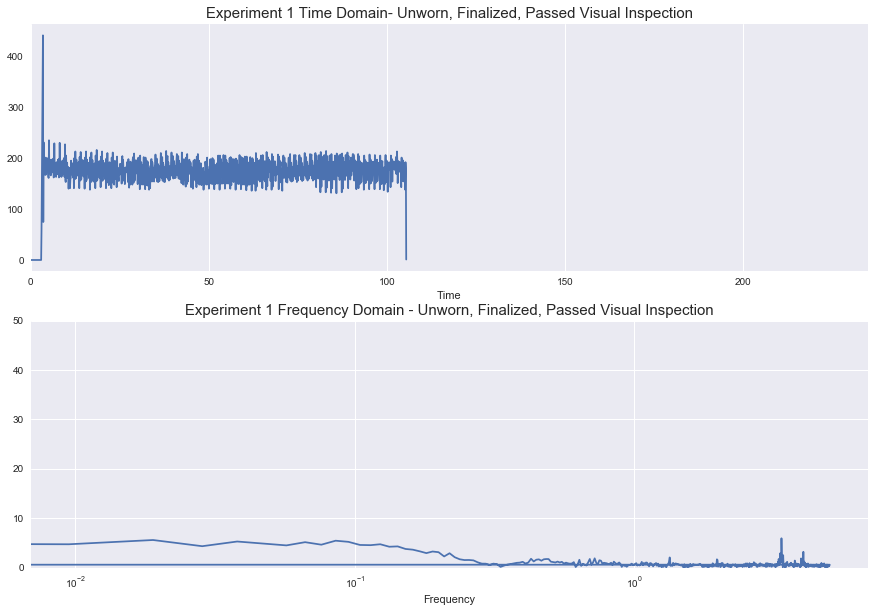

In [27]:
### Experiment 1 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[0].index)*0.1, 0.1), power_signal[0]*1000)
pl.title("Experiment 1 Time Domain- Unworn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[0], ps_psd[0])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
# plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.title("Experiment 1 Frequency Domain - Unworn, Finalized, Passed Visual Inspection", fontsize = 15);

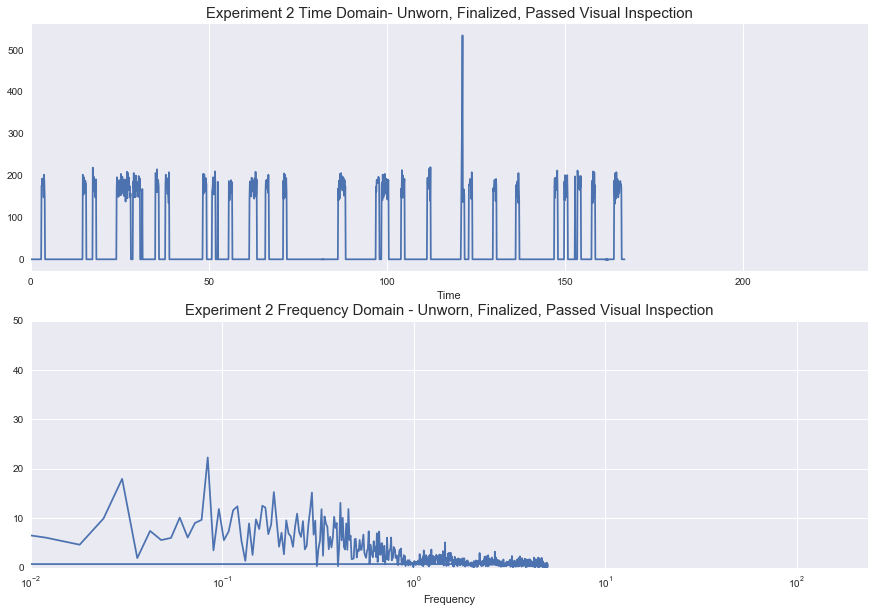

In [26]:
### Experiment 2 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[1].index)*0.1, 0.1), power_signal[1]*1000)
pl.title("Experiment 2 Time Domain- Unworn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[1], ps_psd[1])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 2 Frequency Domain - Unworn, Finalized, Passed Visual Inspection", fontsize = 15);

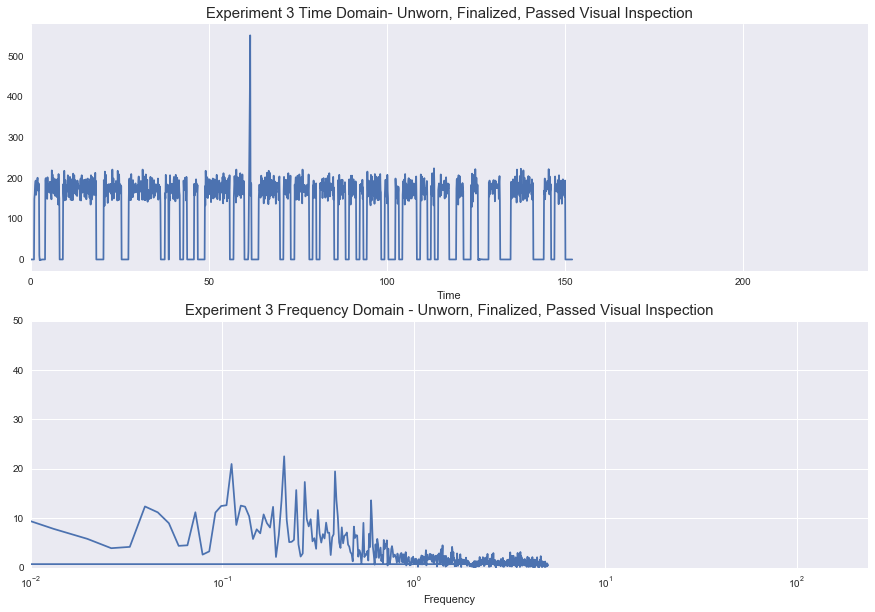

In [10]:
### Experiment 3 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[2].index)*0.1, 0.1), power_signal[2]*1000)
pl.title("Experiment 3 Time Domain- Unworn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[2], ps_psd[2])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 3 Frequency Domain - Unworn, Finalized, Passed Visual Inspection", fontsize = 15);

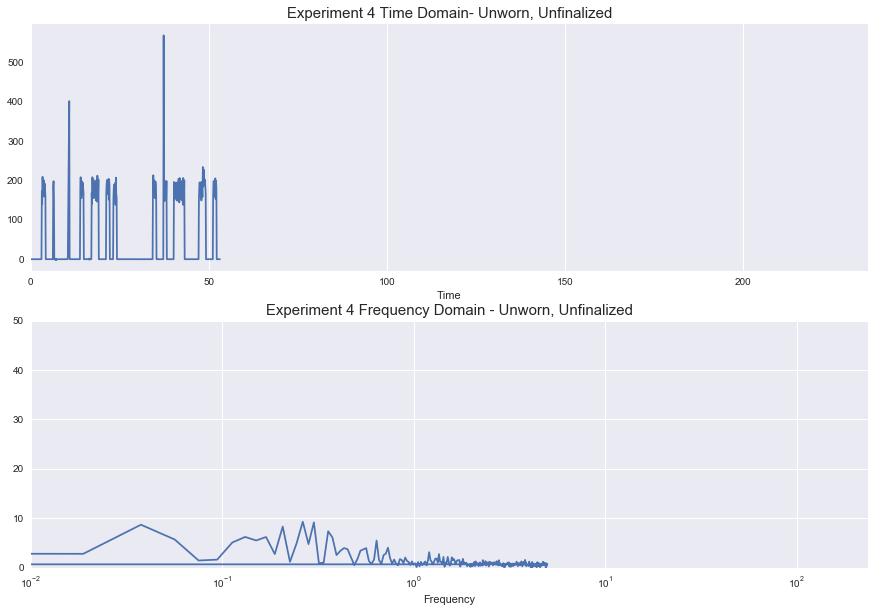

In [11]:
### Experiment 4 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[3].index)*0.1, 0.1), power_signal[3]*1000)
pl.title("Experiment 4 Time Domain- Unworn, Unfinalized", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[3], ps_psd[3])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 4 Frequency Domain - Unworn, Unfinalized", fontsize = 15);

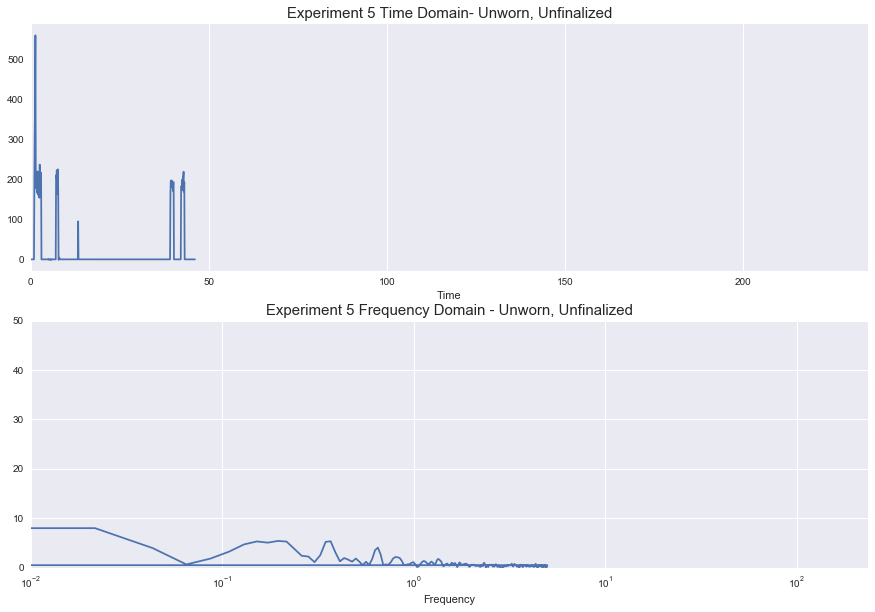

In [12]:
### Experiment 5 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[4].index)*0.1, 0.1), power_signal[4]*1000)
pl.title("Experiment 5 Time Domain- Unworn, Unfinalized", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[4], ps_psd[4])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 5 Frequency Domain - Unworn, Unfinalized", fontsize = 15);

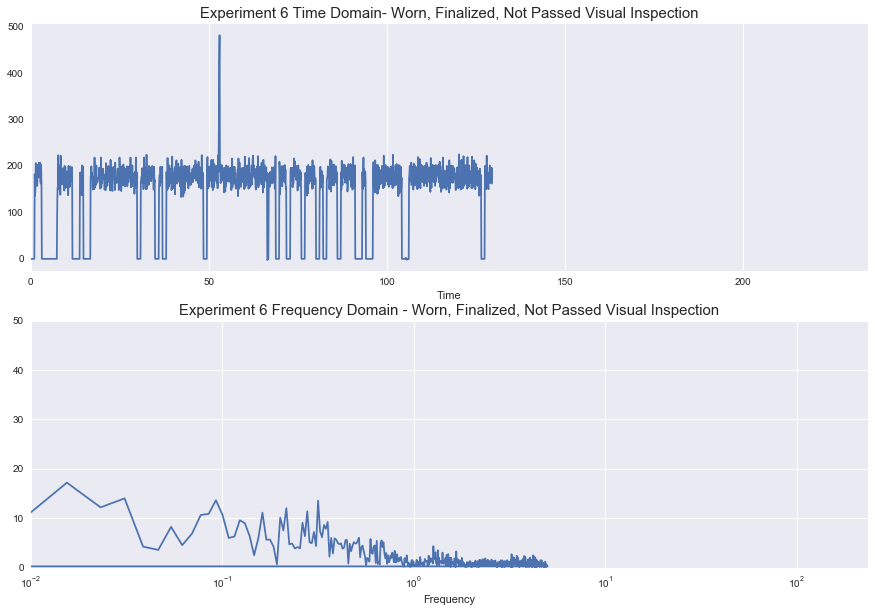

In [13]:
### Experiment 6 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[5].index)*0.1, 0.1), power_signal[5]*1000)
pl.title("Experiment 6 Time Domain- Worn, Finalized, Not Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[5], ps_psd[5])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 6 Frequency Domain - Worn, Finalized, Not Passed Visual Inspection", fontsize = 15);

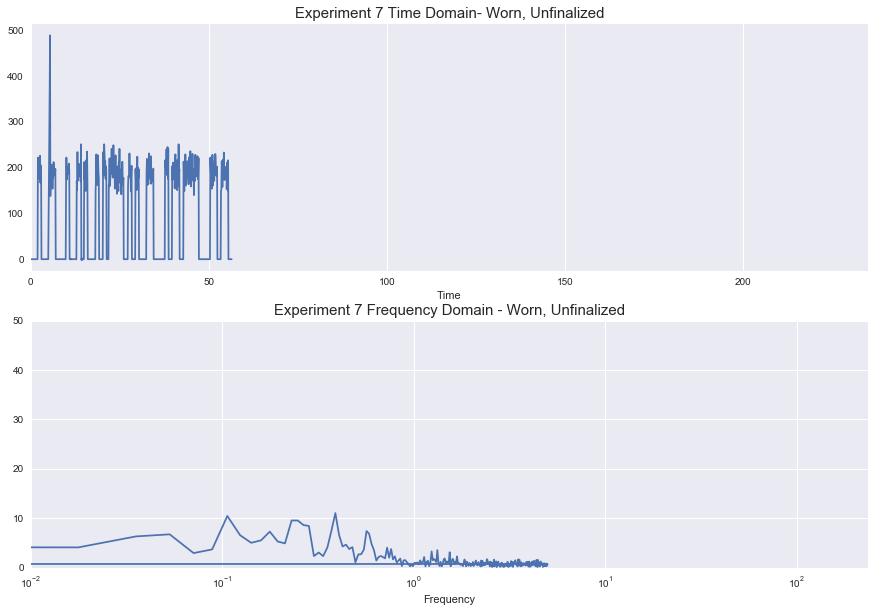

In [14]:
### Experiment 7 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[6].index)*0.1, 0.1), power_signal[6]*1000)
pl.title("Experiment 7 Time Domain- Worn, Unfinalized", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[6], ps_psd[6])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 7 Frequency Domain - Worn, Unfinalized", fontsize = 15);

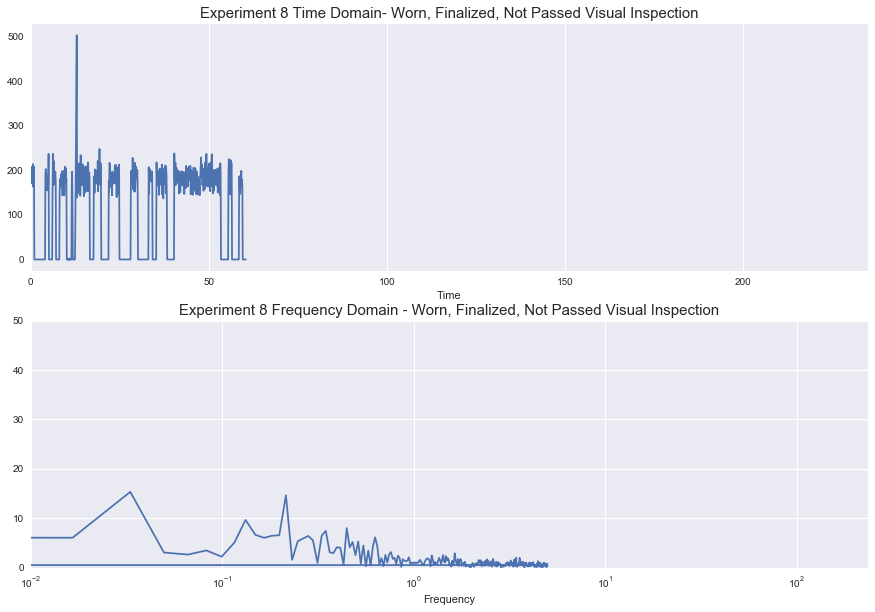

In [15]:
### Experiment 8 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[7].index)*0.1, 0.1), power_signal[7]*1000)
pl.title("Experiment 8 Time Domain- Worn, Finalized, Not Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[7], ps_psd[7])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 8 Frequency Domain - Worn, Finalized, Not Passed Visual Inspection", fontsize = 15);

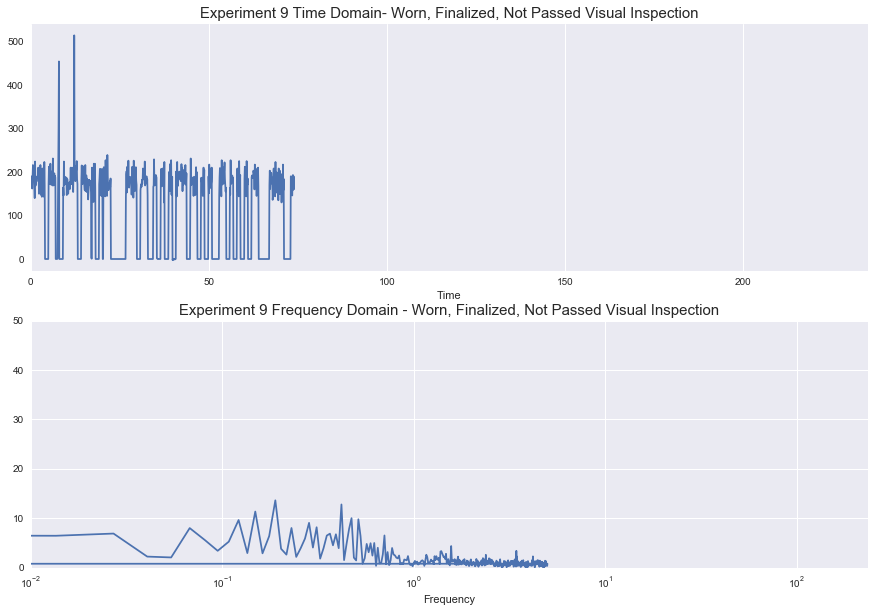

In [16]:
### Experiment 9 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[8].index)*0.1, 0.1), power_signal[8]*1000)
pl.title("Experiment 9 Time Domain- Worn, Finalized, Not Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[8], ps_psd[8])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 9 Frequency Domain - Worn, Finalized, Not Passed Visual Inspection", fontsize = 15);

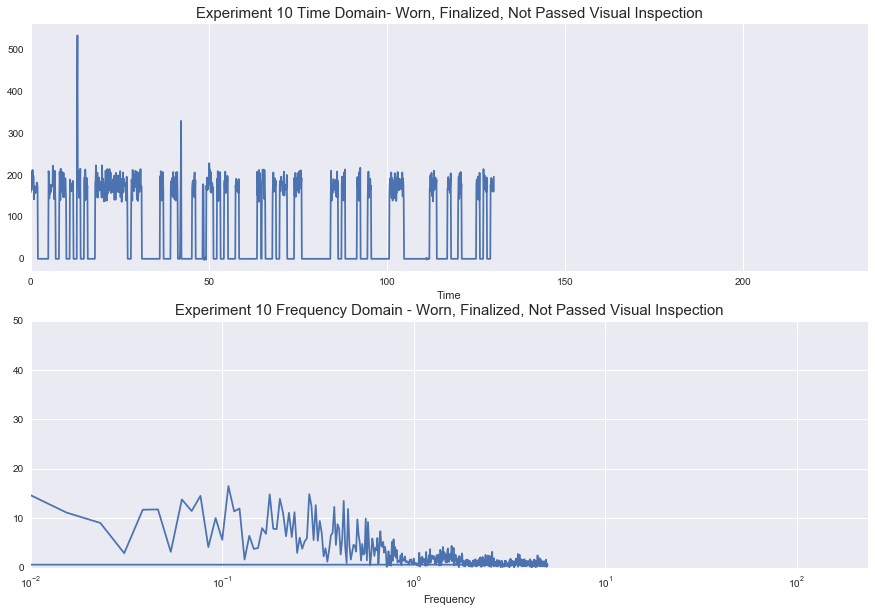

In [17]:
### Experiment 10 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[9].index)*0.1, 0.1), power_signal[9]*1000)
pl.title("Experiment 10 Time Domain- Worn, Finalized, Not Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[9], ps_psd[9])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 10 Frequency Domain - Worn, Finalized, Not Passed Visual Inspection", fontsize = 15);

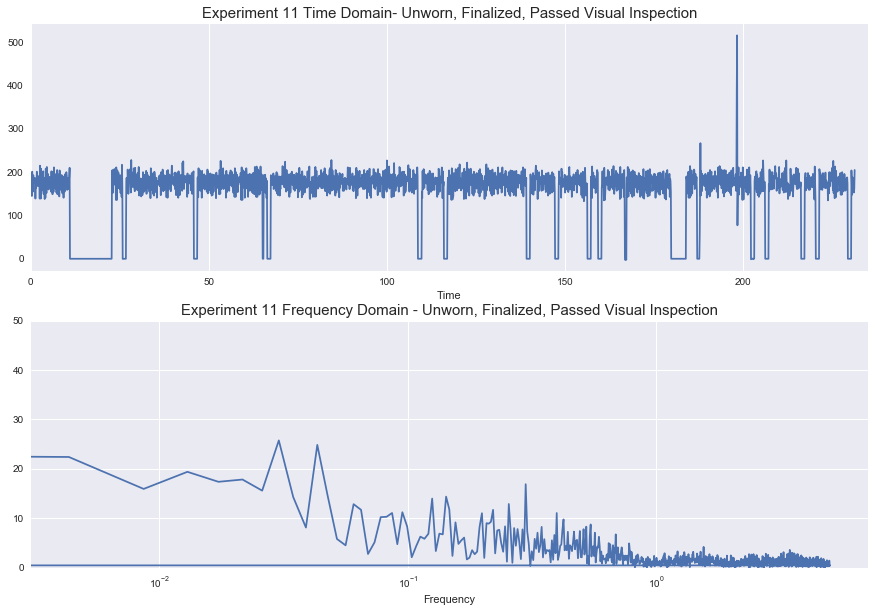

In [18]:
### Experiment 11 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[10].index)*0.1, 0.1), power_signal[10]*1000)
pl.title("Experiment 11 Time Domain- Unworn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[10], ps_psd[10])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
# plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 11 Frequency Domain - Unworn, Finalized, Passed Visual Inspection", fontsize = 15);

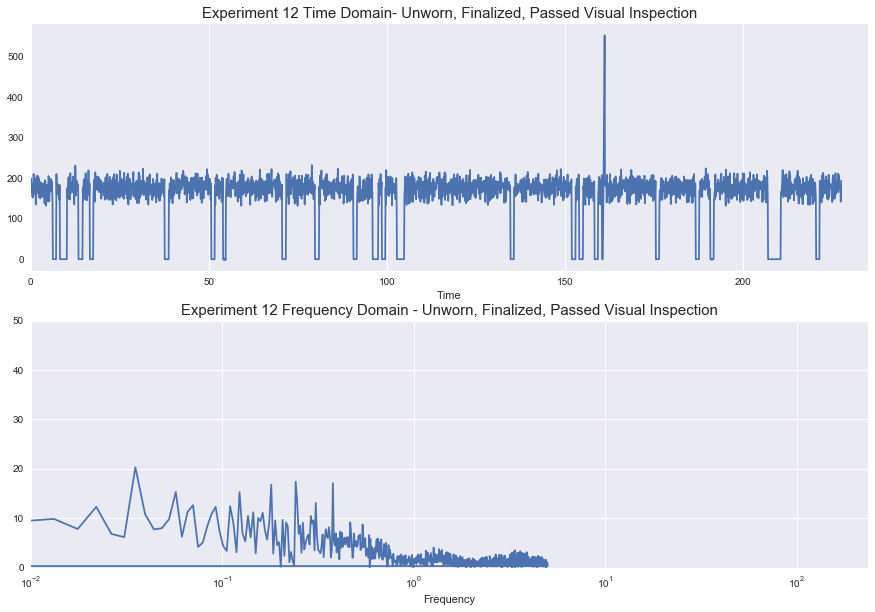

In [19]:
### Experiment 12 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[11].index)*0.1, 0.1), power_signal[11]*1000)
pl.title("Experiment 12 Time Domain- Unworn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[11], ps_psd[11])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 12 Frequency Domain - Unworn, Finalized, Passed Visual Inspection", fontsize = 15);

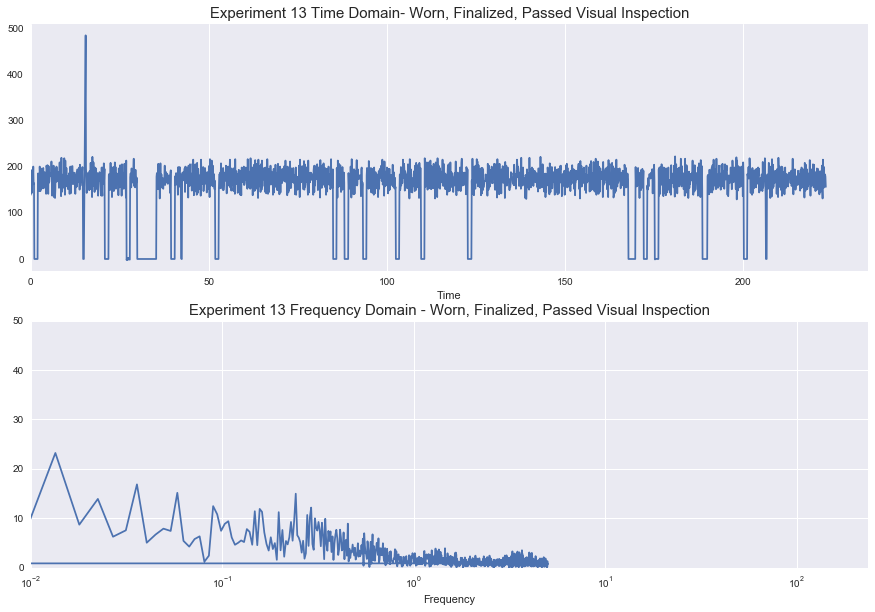

In [20]:
### Experiment 13 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[12].index)*0.1, 0.1), power_signal[12]*1000)
pl.title("Experiment 13 Time Domain- Worn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[12], ps_psd[12])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 13 Frequency Domain - Worn, Finalized, Passed Visual Inspection", fontsize = 15);

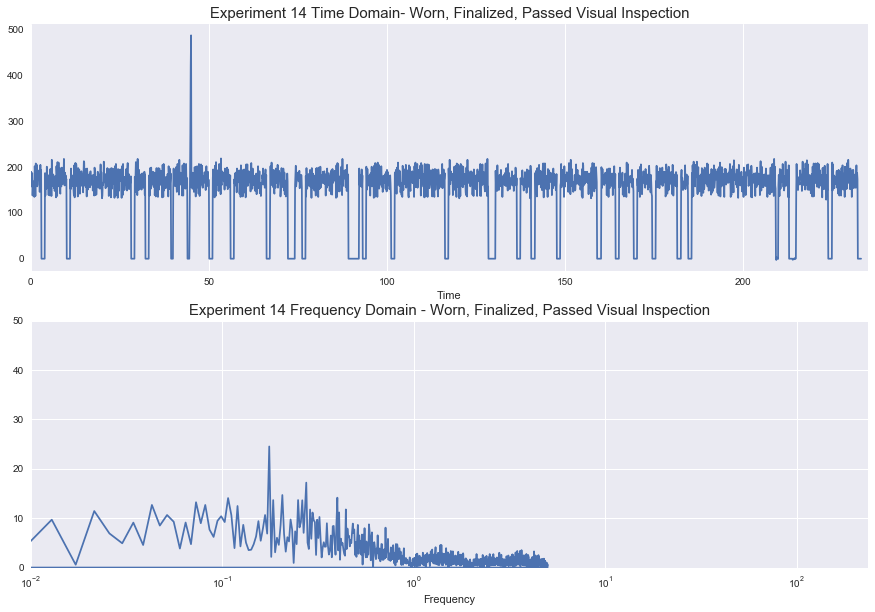

In [21]:
### Experiment 14 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[13].index)*0.1, 0.1), power_signal[13]*1000)
pl.title("Experiment 14 Time Domain- Worn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[13], ps_psd[13])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 14 Frequency Domain - Worn, Finalized, Passed Visual Inspection", fontsize = 15);

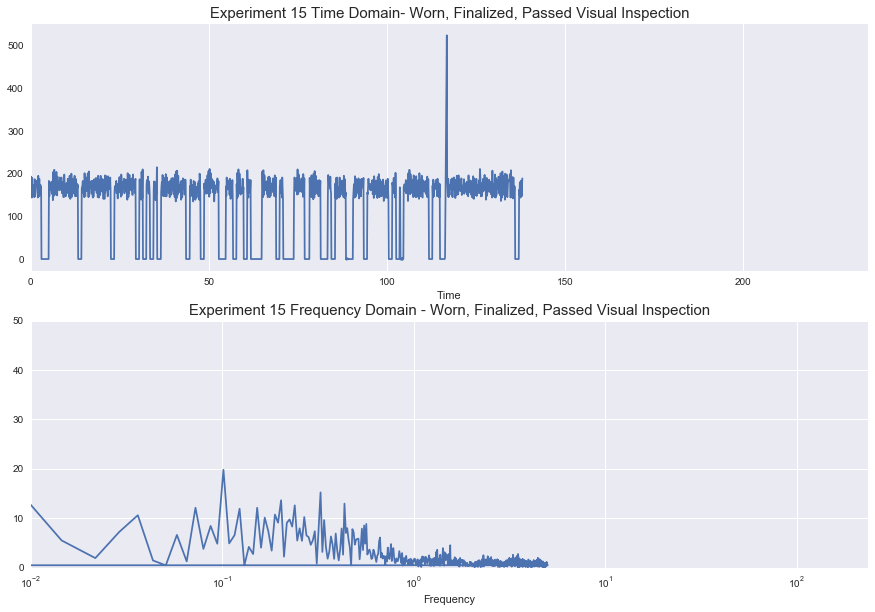

In [22]:
### Experiment 15 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[14].index)*0.1, 0.1), power_signal[14]*1000)
pl.title("Experiment 15 Time Domain- Worn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[14], ps_psd[14])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 15 Frequency Domain - Worn, Finalized, Passed Visual Inspection", fontsize = 15);

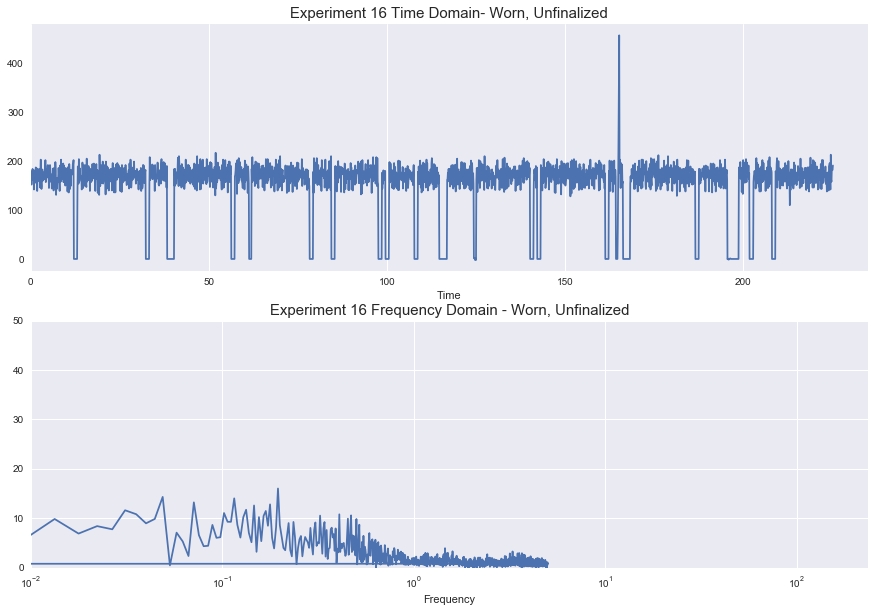

In [23]:
### Experiment 16 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[17].index)*0.1, 0.1), power_signal[17]*1000)
pl.title("Experiment 16 Time Domain- Worn, Unfinalized", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[17], ps_psd[17])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 16 Frequency Domain - Worn, Unfinalized", fontsize = 15);

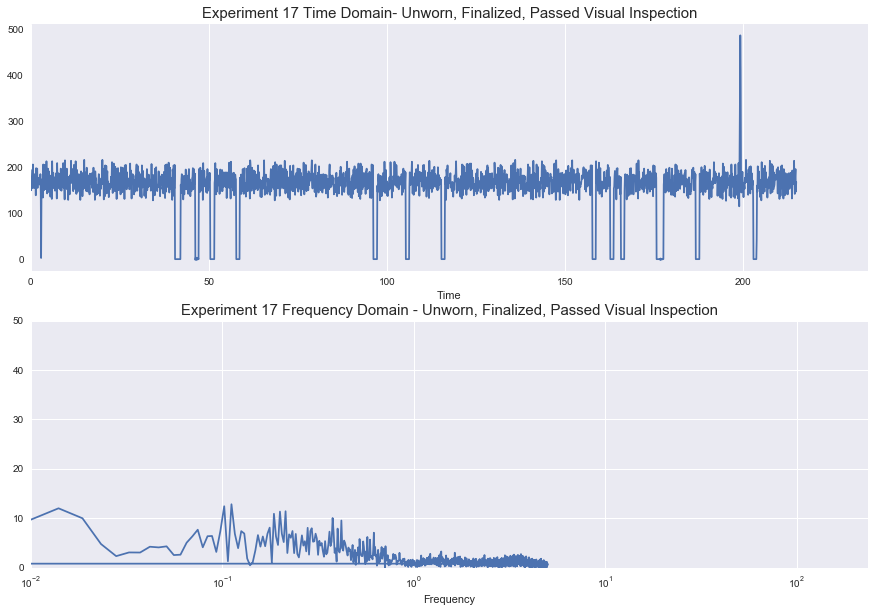

In [24]:
### Experiment 17 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[16].index)*0.1, 0.1), power_signal[16]*1000)
pl.title("Experiment 17 Time Domain- Unworn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[16], ps_psd[16])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 17 Frequency Domain - Unworn, Finalized, Passed Visual Inspection", fontsize = 15);

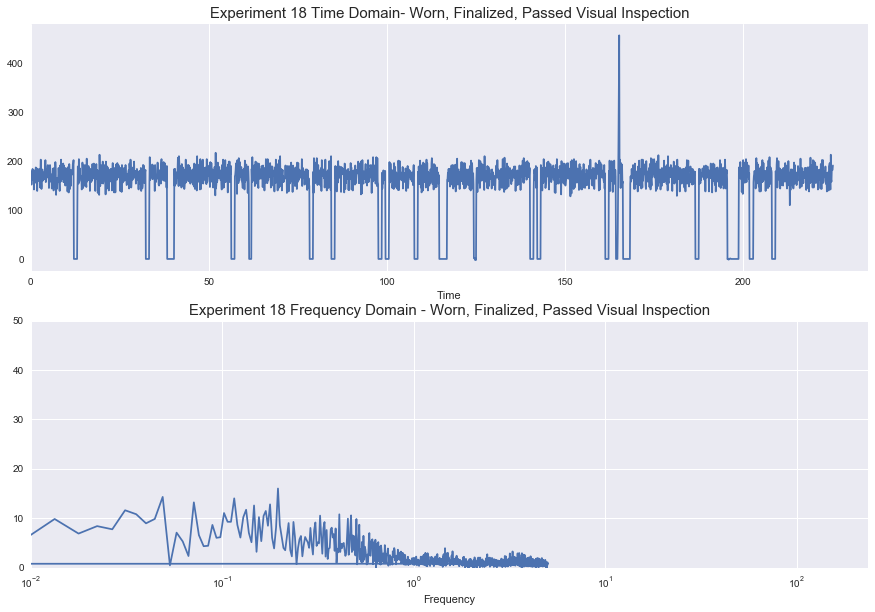

In [25]:
### Experiment 18 ###
gs = gridspec.GridSpec(2, 1)
pl.figure(figsize = (15,10))

# Time Domain
ax = pl.subplot(gs[0,0])
pl.plot(np.arange(0,len(power_signal[17].index)*0.1, 0.1), power_signal[17]*1000)
pl.title("Experiment 18 Time Domain- Worn, Finalized, Passed Visual Inspection", fontsize = 15)
plt.xlabel("Time")
plt.xlim(left = 0.01, right = 235)
pl.grid(axis = 'y');

# Frequency Domain
ax = pl.subplot(gs[1,0]) 
plt.style.use("seaborn")
plt.plot(ps_freq[17], ps_psd[17])
plt.xscale(value = "log")
plt.ylim(top = 50, bottom = 0)
plt.xlim(left = 0.01, right = 235)
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Experiment 18 Frequency Domain - Worn, Finalized, Passed Visual Inspection", fontsize = 15);